<a href="https://colab.research.google.com/github/chakradhar915/Chakradhar_INFO5502_Spring2022/blob/main/lab_assignment_chakri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [19]:
!unzip /content/preprocessed_cases[cases_29404].zip

Streaming output truncated to the last 5000 lines.
  inflating: preprocessed_cases[cases_29404]/69/case125.txt  
  inflating: preprocessed_cases[cases_29404]/69/case1250.txt  
  inflating: preprocessed_cases[cases_29404]/69/case1253.txt  
  inflating: preprocessed_cases[cases_29404]/69/case1255.txt  
  inflating: preprocessed_cases[cases_29404]/69/case1258.txt  
  inflating: preprocessed_cases[cases_29404]/69/case126.txt  
  inflating: preprocessed_cases[cases_29404]/69/case1260.txt  
  inflating: preprocessed_cases[cases_29404]/69/case1261.txt  
  inflating: preprocessed_cases[cases_29404]/69/case1263.txt  
  inflating: preprocessed_cases[cases_29404]/69/case127.txt  
  inflating: preprocessed_cases[cases_29404]/69/case1270.txt  
  inflating: preprocessed_cases[cases_29404]/69/case1272.txt  
  inflating: preprocessed_cases[cases_29404]/69/case1273.txt  
  inflating: preprocessed_cases[cases_29404]/69/case1274.txt  
  inflating: preprocessed_cases[cases_29404]/69/case1275.txt  
  infla

In [113]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
file_path = os.listdir("/content/preprocessed_cases[cases_29404]")
l = len(file_path)
print('{} categories are present'.format(l))

76 categories are present


In [21]:
total_len = 0
for i in file_path:
    documents = os.listdir("/content/preprocessed_cases[cases_29404]/{}".format((i)))
    total_len = total_len+len(documents)
    print('In file {} we have {} documents'.format(i,len(documents)))
print("total file count", total_len)

In file 32 we have 118 documents
In file 7 we have 621 documents
In file 51 we have 225 documents
In file 62 we have 218 documents
In file 67 we have 356 documents
In file 11 we have 605 documents
In file 25 we have 244 documents
In file 38 we have 503 documents
In file 60 we have 42 documents
In file 17 we have 125 documents
In file 4 we have 231 documents
In file 13 we have 458 documents
In file 47 we have 151 documents
In file 75 we have 473 documents
In file 68 we have 263 documents
In file 5 we have 751 documents
In file 58 we have 150 documents
In file 37 we have 74 documents
In file 33 we have 272 documents
In file 36 we have 889 documents
In file 29 we have 213 documents
In file 52 we have 318 documents
In file 24 we have 628 documents
In file 27 we have 77 documents
In file 76 we have 177 documents
In file 50 we have 68 documents
In file 55 we have 48 documents
In file 78 we have 242 documents
In file 57 we have 108 documents
In file 3 we have 184 documents
In file 69 we have 

In [131]:
import re

total_words = 0
total_sen = 0
count_file = 0
new_lis = []
for i in file_path:
    documents = os.listdir("/content/preprocessed_cases[cases_29404]/{}".format((i)))
    for j in documents:
        f = open("/content/preprocessed_cases[cases_29404]/{}/{}".format(i,j),encoding="utf8")
        text = f.read()
        #spliting with "." to find the sentences
        split_line = text.split(".")
        #spliting with ","(comma) "."(dot) " "(space) to find the words
        #split_word = re.split("\s|(?<!\d)[,.](?!\d)", text)
        split_word = text.split()
        #for new in split_word:
         # new_lis.append(new)
        total_words += len(split_word)
        total_sen =+ len(split_line)
        count_file = count_file+1
        print("category number = " , i ,"file=",j, "words:", len(split_word),"sentences: ",len(split_line),"file count", count_file)
        f.close()
print("Avg number of words by file count", total_words/count_file, "Avg number of sentences by file count",total_sen/count_file )
print("Avg number of words by category", total_words/l, "Avg number of sentences by category",total_sen/l )

Streaming output truncated to the last 5000 lines.
category number =  39 file= case717.txt words: 10497 sentences:  542 file count 24407
category number =  39 file= case329.txt words: 11277 sentences:  497 file count 24408
category number =  39 file= case337.txt words: 1215 sentences:  76 file count 24409
category number =  39 file= case161.txt words: 1226 sentences:  69 file count 24410
category number =  39 file= case514.txt words: 1204 sentences:  48 file count 24411
category number =  39 file= case832.txt words: 1238 sentences:  77 file count 24412
category number =  39 file= case332.txt words: 6101 sentences:  305 file count 24413
category number =  39 file= case372.txt words: 1192 sentences:  65 file count 24414
category number =  39 file= case611.txt words: 1209 sentences:  79 file count 24415
category number =  39 file= case162.txt words: 2478 sentences:  122 file count 24416
category number =  39 file= case15.txt words: 2240 sentences:  131 file count 24417
category number =  

In [23]:
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
stopwords = nltk.corpus.stopwords.words('english')
new_lis = []
for i in file_path:
    documents = os.listdir("/content/preprocessed_cases[cases_29404]/{}".format((i)))
    for j in documents:
        f = open("/content/preprocessed_cases[cases_29404]/{}/{}".format(i,j),encoding="utf8")
        text = f.read()
        #spliting to words to find the words
        split_word = text.split()
        raw_lis = (new_word.lower() for new_word in split_word if new_word not in stopwords)
        for new in raw_lis:
          new_lis.append(new)
disct1 = FreqDist(new_lis)
print(disct1.most_common(50))



[('court', 949241), ('district', 398352), ('would', 297441), ('state', 246000), ('also', 223022), ('whether', 193495), ('evidence', 191410), ('may', 182237), ('law', 168041), ('states', 162966), ('federal', 160863), ('must', 159473), ('claim', 154370), ('case', 153364), ('united', 150007), ('trial', 145932), ('claims', 142378), ('judgment', 139964), ('could', 138161), ('one', 137068), ('action', 129849), ('order', 129182), ('first', 123599), ('government', 121202), ('act', 116742), ('defendant', 115075), ('section', 114283), ('two', 111366), ('review', 110406), ('motion', 110067), ('new', 109265), ('issue', 107838), ('decision', 106648), ('rule', 106018), ('plaintiff', 102899), ('time', 101280), ('plaintiffs', 100792), ('filed', 97450), ('public', 95288), ('jury', 93242), ('made', 93135), ('statute', 91063), ('right', 90844), ('defendants', 89316), ('found', 88430), ('held', 87485), ('parties', 86635), ('supreme', 86169), ('use', 83879), ('based', 81097)]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

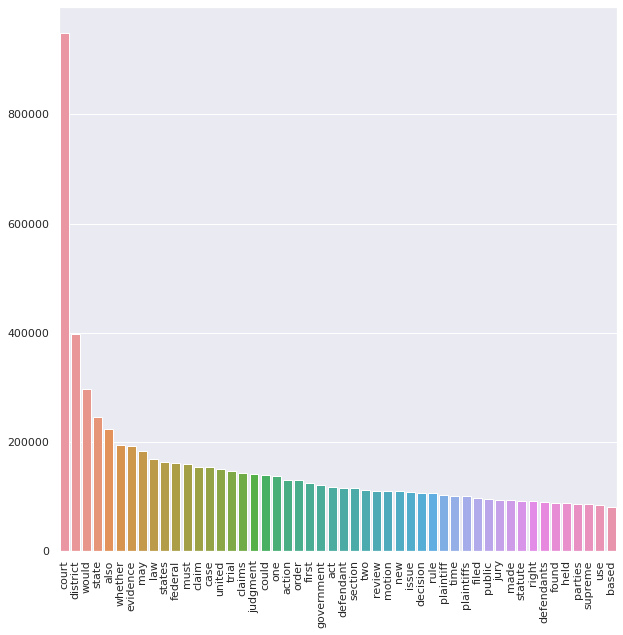

In [114]:

all_fdist = pd.Series(dict(disct1.most_common(50)))
pic, apx = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=apx)
plt.xticks(rotation=90)


In [134]:
count = 0
for i in disct1.most_common(50):
    count += 1
    print("Rank",count,i)

Rank 1 ('court', 949241)
Rank 2 ('district', 398352)
Rank 3 ('would', 297441)
Rank 4 ('state', 246000)
Rank 5 ('also', 223022)
Rank 6 ('whether', 193495)
Rank 7 ('evidence', 191410)
Rank 8 ('may', 182237)
Rank 9 ('law', 168041)
Rank 10 ('states', 162966)
Rank 11 ('federal', 160863)
Rank 12 ('must', 159473)
Rank 13 ('claim', 154370)
Rank 14 ('case', 153364)
Rank 15 ('united', 150007)
Rank 16 ('trial', 145932)
Rank 17 ('claims', 142378)
Rank 18 ('judgment', 139964)
Rank 19 ('could', 138161)
Rank 20 ('one', 137068)
Rank 21 ('action', 129849)
Rank 22 ('order', 129182)
Rank 23 ('first', 123599)
Rank 24 ('government', 121202)
Rank 25 ('act', 116742)
Rank 26 ('defendant', 115075)
Rank 27 ('section', 114283)
Rank 28 ('two', 111366)
Rank 29 ('review', 110406)
Rank 30 ('motion', 110067)
Rank 31 ('new', 109265)
Rank 32 ('issue', 107838)
Rank 33 ('decision', 106648)
Rank 34 ('rule', 106018)
Rank 35 ('plaintiff', 102899)
Rank 36 ('time', 101280)
Rank 37 ('plaintiffs', 100792)
Rank 38 ('filed', 9745

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

![heatmap.png](attachment:heatmap.png)

In [115]:
# Your answer here (code + explanation):

import pandas as pd
#reading the csv file by using pandas
df = pd.read_csv('/content/lab_4.csv')

#getting the number of rows by using shape menthod which gives rows,columns
print("total number of rows",df.shape[0])

#printig the number of unique elements in each row
print("number of unique elements in each row\n",df.nunique())

#printing the frequence of each unique element
print("Frequency of each unique element")
lis1 = df.columns.values.tolist()
for i in range(0,len(lis1)-1):
    s = pd.Series((df[lis1[i]].values[0:]))
    print(s.value_counts())



total number of rows 131
number of unique elements in each row
 ge             2
cst            5
tnp            4
twp            4
iap            4
esp            4
arr            2
ms             1
ls             2
as             2
fmi            5
fs             3
fq             6
mq             6
fo             5
mo             5
nf             3
sh             3
ss             2
me             4
tt             3
atd            3
Unnamed: 22    0
dtype: int64
Frequency of each unique element
M    72
F    59
dtype: int64
OBC     57
G       44
ST      20
MOBC     6
SC       4
dtype: int64
Good    59
Vg      38
Pass    25
Best     9
dtype: int64
Good    65
Vg      44
Pass    17
Best     5
dtype: int64
Vg      63
Good    53
Best     8
Pass     7
dtype: int64
Good    54
Vg      42
Pass    27
Best     8
dtype: int64
N    78
Y    53
dtype: int64
Unmarried    131
dtype: int64
V    92
T    39
dtype: int64
Paid    76
Free    55
dtype: int64
Medium    63
Am        27
Low       20
High      15

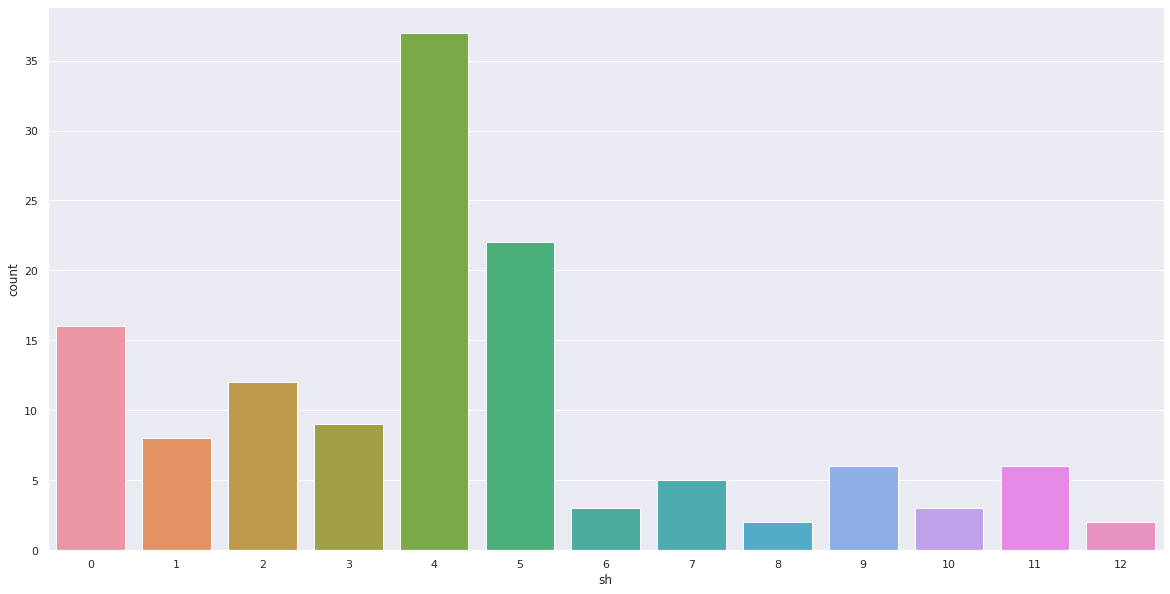

In [116]:
import random
import seaborn as sns
#converting the values as mentioned in the question with respect to the SH value
data_2nd = pd.DataFrame(df.sh)
for i in data_2nd.index:
    if data_2nd['sh'][i] == "Good":
      data_2nd['sh'][i] = random.randint(6,12)
    elif data_2nd['sh'][i] == "Average":
      data_2nd['sh'][i] = random.randint(4,5)
    elif data_2nd['sh'][i] == "Poor":
      data_2nd['sh'][i] = random.randint(0,3)
sns.countplot(data_2nd['sh'])

Average    59
Poor       45
Good       27
Name: sh, dtype: int64


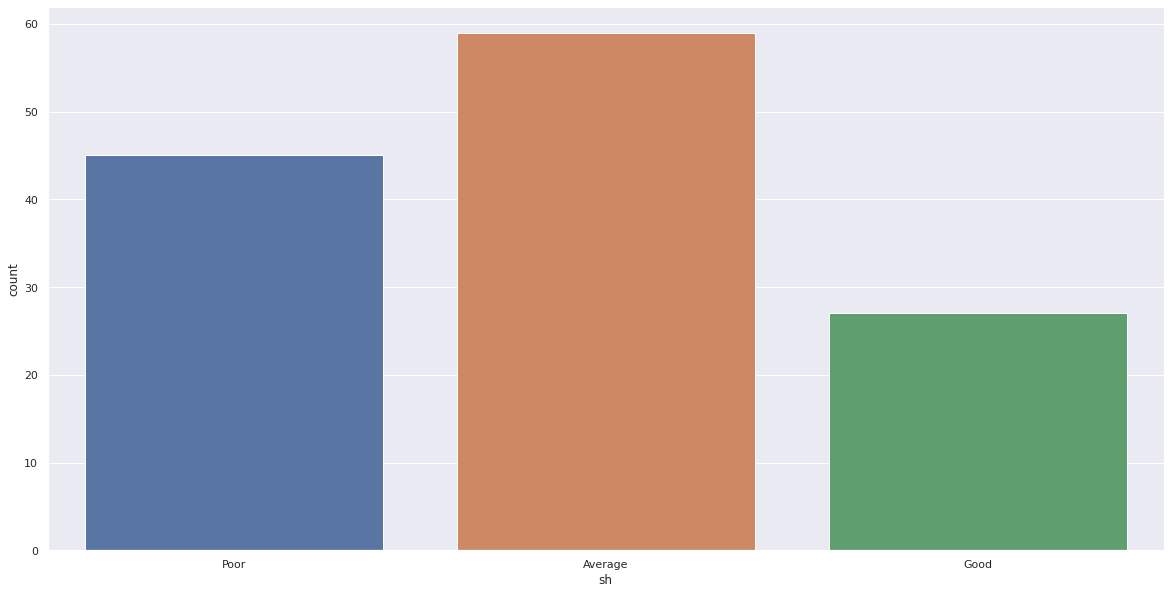

In [129]:
#2nd question without converting the value and only cheking the count
print(df['sh'].value_counts())
#df['sh'].value_counts()[:20].plot(kind='barh')
sns.countplot(df['sh'])

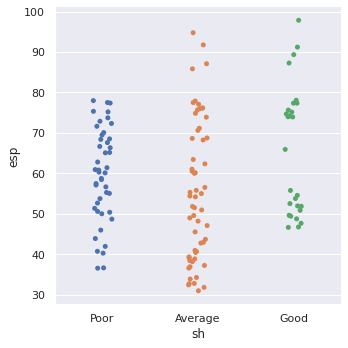

In [118]:

data_new = df[['sh','esp']]
#changing categorical values to numarical
for i in data_new.index:
    if data_new['esp'][i] == "Best":
      data_new['esp'][i] = random.uniform(80,100)
    elif data_new['esp'][i] == "Good":
      data_new['esp'][i] = random.uniform(60,79)
    elif data_new['esp'][i] == "Vg":
      data_new['esp'][i] = random.uniform(45,59)
    elif data_new['esp'][i] == "Pass":
      data_new['esp'][i] = random.uniform(30,44)
    elif data_new['esp'][i] == "Fail":
      data_new['esp'][i] = random.uniform(0,29)
  #ploting the factorplot
sns.factorplot(x='sh',y='esp', kind = 'strip',data=data_new)

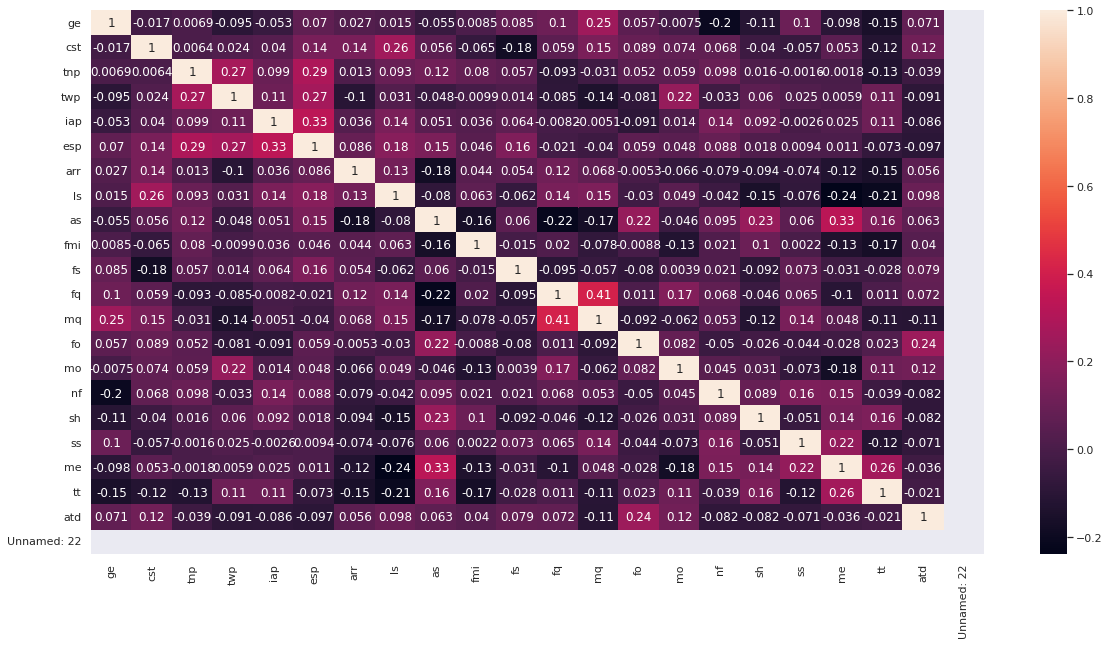

In [119]:

from sklearn import preprocessing
import seaborn as sns
def encFuc(d_f):
    to_sel_dtype = list(d_f.select_dtypes(include=['category','object']))
    enc_lable = preprocessing.LabelEncoder()
    for i in to_sel_dtype:
        try:
          #ransforming each value to fit the transforation
            d_f[i] = enc_lable.fit_transform(df[i])
        except:
            print('Error encoding '+i)
    return d_f
dfCopy = df.copy()
data_frame = encFuc(dfCopy)
data_frame = data_frame.drop('ms', axis = 1)
#data_frame = data_frame.drop('unnamed: 22', axis = 1)
#taking the dorrelation of data frame
correlation = data_frame.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(correlation,annot=True)

plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [121]:
# Your three questions:

'''
1) To visualize amount spent by each team each year.
2) By chekcing the data I want to find most expensive player with respect to the ILP auction of each year.
3) I want to find which role of players are sold in auction on each year.




'''

'\n1) To visualize amount spent by each team each year.\n2) By chekcing the data I want to find most expensive player with respect to the ILP auction of each year.\n3) I want to find which role of players are sold in auction on each year.\n\n\n\n\n'

In [122]:
ilp_data_set = pd.read_csv("/content/IPLPlayerAuctionData.csv")
ilp_data_set


,Player,Role,Amount,Team,Year,Player Origin
0,Aaron Finch,Batsman,40000000,Sunrisers Hyderabad,2014.0,Overseas
1,Aaron Finch,Batsman,32000000,Mumbai Indians,2015.0,Overseas
2,Aaron Finch,Batsman,10000000,Gujarat Lions,2016.0,Overseas
3,Aaron Finch,Batsman,62000000,Kings XI Punjab,2018.0,Overseas
4,Aaron Finch,Batsman,44000000,Royal Challengers Bangalore,2020.0,Overseas
...,...,...,...,...,...,...
965,Yuzvendra Singh Chahal,Bowler,1000000,Royal Challengers Bangalore,2014.0,Indian
966,Yuzvendra Singh Chahal,Bowler,60000000,Royal Challengers Bangalore,2018.0,Indian
967,Zaheer Khan,Bowler,26000000,Mumbai Indians,2014.0,Indian
968,Zaheer Khan,Bowler,40000000,Delhi Daredevils,2015.0,Indian


In [123]:
#getting the all 
ilp_data_set.isnull().sum()
#removing the row where 
ilp_data_set.dropna(inplace=True)
#converting float to int 
ilp_data_set.Year = ilp_data_set.Year.apply(int)

In [124]:
teams = ilp_data_set.Team.unique()
#ploting the amount spent of all the teams
for team in teams:
    data_set = ilp_data_set[ilp_data_set['Team'] == team].groupby('Year')['Amount'].sum()
    pic = px.line(data_set, x = data_set.index, y = 'Amount', title = f"{team}'s spent amount", text=data_set.index)
    pic.update_traces(textposition="top right")
    pic.show()

In [125]:
#taking the values of all teams to data_set
data_set = pd.DataFrame(ilp_data_set.groupby(['Team', 'Year'])['Amount'].sum()).reset_index()
#drawing the line graph of all the differentiate with the colour
pic = px.line(data_set, x='Year', y='Amount', color='Team', symbol='Team')
#updating the layout title
pic.update_layout(title_text = "Overall comparision of different countries")
pic.show()

In [126]:
data = []
for i in sorted(ilp_data_set.Year.unique()):
    df_1 = pd.DataFrame(ilp_data_set.groupby('Year').get_group(i))
    #we are checking the max amount
    df_1 = df_1[df_1['Amount'] == df_1.Amount.max()]
    #making the list of year,player,amount,team
    data.append([i, np.array(df_1["Player"]), np.array(df_1["Amount"])[0], np.array(df_1["Team"])[0]])
data = pd.DataFrame(data, columns=["Year", "Players", "Amount", "Team"])
#ploting by using the line graph
pic = px.line(data, x = data.Year, y= data.Amount, title = "Most Expensive Player Each year", text=data.Players)
pic.update_traces(textposition="top right")
pic.show()
#we are showing the data in the table
pic = go.Figure(data=[go.Table(header=dict(values=['Year', 'Player','Team', 'Amount']), cells=dict(values=[data.Year, data.Players, data.Team, data.Amount]))])
pic.show()

In [127]:
years = ilp_data_set.Year.unique()
for year in sorted(years):
    #when year is same we are taking the count of depending upon the role
    data = ilp_data_set[ilp_data_set['Year'] == year]
    fig = px.histogram(data, x="Role", title = f"Count Plot Based on role for {year}")
    fig.show()

In [128]:
#taking the values of all teams to data_set
data_set = pd.DataFrame(ilp_data_set.groupby(['Role', 'Year'])['Amount'].sum()).reset_index()
#drawing the line graph of all the differentiate with the colour
fig = px.line(data_set, x='Year', y='Amount', color='Role', symbol='Role')
fig.update_layout(title_text = "Overall comparision of different Roles")
fig.show()